In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [3]:
import io
from google.colab import files
uploaded=files.upload()

Saving train_u6lujuX_CVtuZ9i (1).csv to train_u6lujuX_CVtuZ9i (1).csv


In [4]:
loan_data=pd.read_csv(io.BytesIO(uploaded['train_u6lujuX_CVtuZ9i (1).csv']))

In [5]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_data=loan_data.dropna()
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
loan_data.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Loan_Status':{'Y':1,'N':0}},inplace=True)

In [10]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


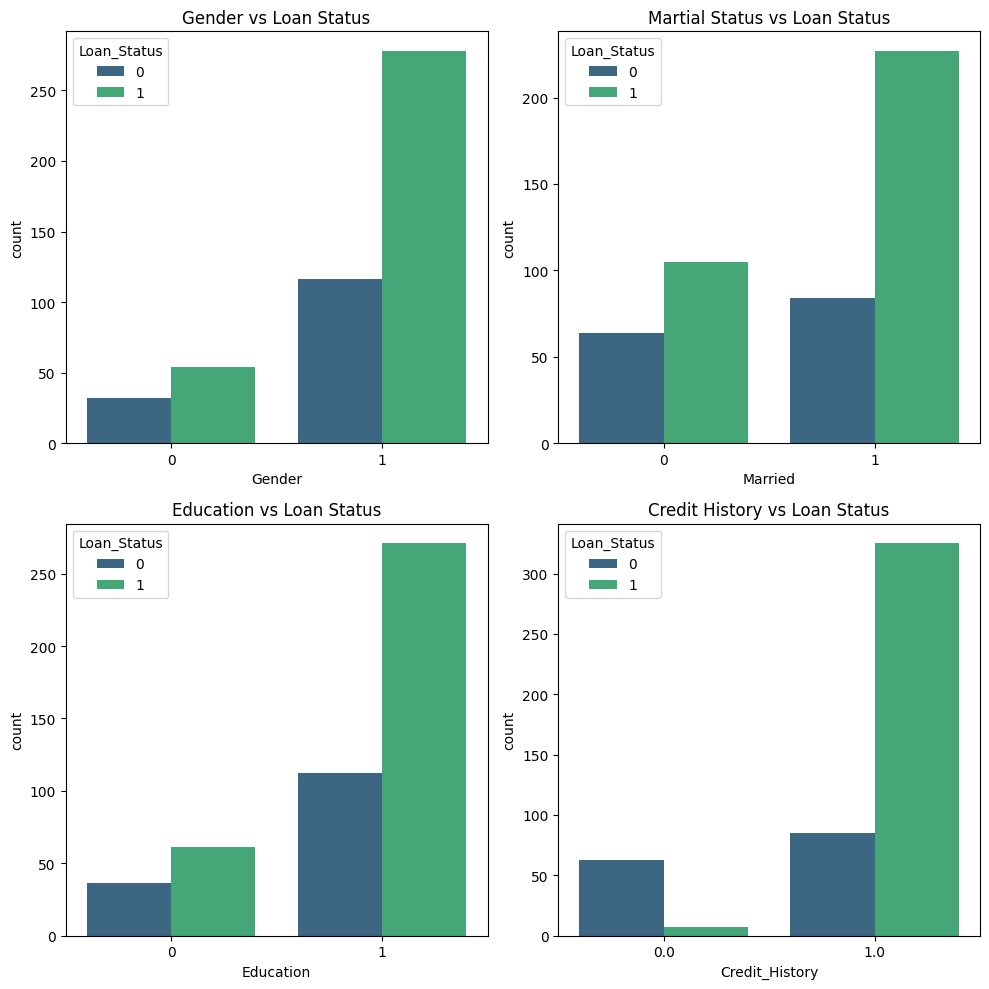

In [37]:
fig, axes=plt.subplots(nrows=2,ncols=2,figsize=(10,10))

#Gender vs Loan Status
sns.countplot(x='Gender',hue='Loan_Status',ax=axes[0,0],data=loan_data,palette='viridis')
axes[0,0].set_title('Gender vs Loan Status')

sns.countplot(x='Married',hue='Loan_Status',ax=axes[0,1],data=loan_data,palette='viridis')
axes[0,1].set_title('Martial Status vs Loan Status')

sns.countplot(x='Education',hue='Loan_Status',ax=axes[1,0],data=loan_data,palette='viridis')
axes[1,0].set_title('Education vs Loan Status')

sns.countplot(x='Credit_History',hue='Loan_Status',ax=axes[1,1],data=loan_data,palette='viridis')
axes[1,1].set_title('Credit History vs Loan Status')

plt.tight_layout()
plt.show()

In [11]:
loan_data.shape

(480, 13)

In [12]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
loan_data=loan_data.replace(to_replace='3+',value=4)

In [14]:
X=loan_data.drop(['Loan_ID','Loan_Status'],axis=1)
y=loan_data['Loan_Status']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [31]:
classifier=svm.SVC(kernel='linear')

In [32]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [33]:
#Accuracy score for train data
X_train_prediction=classifier.predict(X_train)
accuracy_training=accuracy_score(X_train_prediction,y_train)
print(f'Accuracy score for training data: {accuracy_training*100}')

Accuracy score for training data: 77.08333333333334


In [34]:
#Accuracy score for test data
X_test_prediction=classifier.predict(X_test)
accuracy_testing=accuracy_score(X_test_prediction,y_test)
print(f'Accuracy score for test data: {accuracy_testing*100}')

Accuracy score for test data: 81.25
